<a href="https://colab.research.google.com/github/davidogm/TalleresULPGC/blob/main/XAI/XAI_Colab_Kaggle_StudentPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Taller XAI con Google Colab
Este cuaderno muestra cómo usar un dataset educativo con una variable binaria (pass/fail), entrenar un árbol de decisión y aplicar SHAP para interpretar el modelo.

## 3. Cargar y explorar los datos

In [ ]:
import pandas as pd
df = pd.read_csv('student_performance_dataset.csv')
df.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


## 4. Preprocesar datos para entrenamiento

In [ ]:
# Convertir la variable objetivo a binaria y transformar categóricas
df['Pass_Fail'] = df['Pass_Fail'].map({'Pass': 1, 'Fail': 0})
df = pd.get_dummies(df, drop_first=True)
df.head()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score,Pass_Fail,Student_ID_S002,Student_ID_S003,Student_ID_S004,Student_ID_S005,Student_ID_S006,...,Student_ID_S497,Student_ID_S498,Student_ID_S499,Student_ID_S500,Gender_Male,Parental_Education_Level_High School,Parental_Education_Level_Masters,Parental_Education_Level_PhD,Internet_Access_at_Home_Yes,Extracurricular_Activities_Yes
0,31,68.267841,86,63,1,False,False,False,False,False,...,False,False,False,False,True,True,False,False,True,True
1,16,78.222927,73,50,0,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
2,21,87.525096,74,55,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
3,27,92.076483,99,65,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,37,98.655517,63,70,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [ ]:
df.shape

(708, 510)

## 5. Entrenar un árbol de decisión

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df.drop('Pass_Fail', axis=1)
y = df['Pass_Fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
print(f'Precisión: {model.score(X_test, y_test):.2f}')

Precisión: 1.00


## 6. Visualizar el árbol de decisión

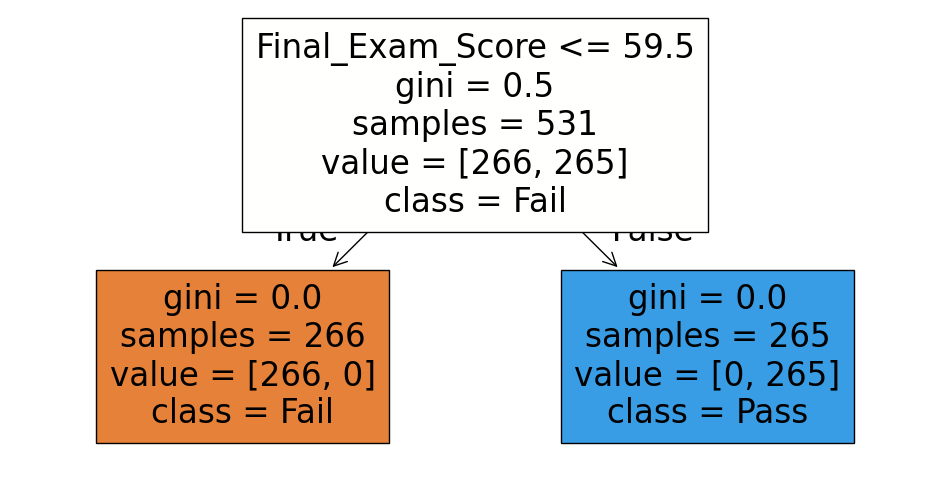

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=X.columns, class_names=['Fail', 'Pass'], filled=True)
plt.show()

**Muy sencillo con la variable nota final, vamos a quitarla a ver cómo predice**

In [ ]:
df_predict = df.drop('Final_Exam_Score', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df_predict.drop('Pass_Fail', axis=1)
y = df_predict['Pass_Fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
print(f'Precisión: {model.score(X_test, y_test):.2f}')

Precisión: 0.72


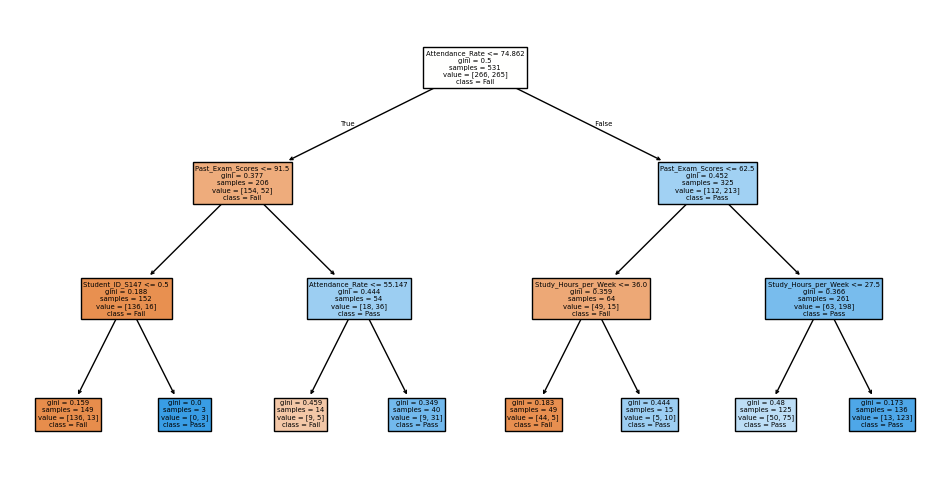

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=X.columns, class_names=['Fail', 'Pass'], filled=True)
plt.show()

## 7. Interpretar con SHAP

In [ ]:
!pip install shap

In [ ]:
df_predict.head()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Pass_Fail,Student_ID_S002,Student_ID_S003,Student_ID_S004,Student_ID_S005,Student_ID_S006,Student_ID_S007,...,Student_ID_S497,Student_ID_S498,Student_ID_S499,Student_ID_S500,Gender_Male,Parental_Education_Level_High School,Parental_Education_Level_Masters,Parental_Education_Level_PhD,Internet_Access_at_Home_Yes,Extracurricular_Activities_Yes
0,31,68.267841,86,1,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,True,True
1,16,78.222927,73,0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
2,21,87.525096,74,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
3,27,92.076483,99,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,37,98.655517,63,1,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [ ]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(random_state=42)
lgb.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 531, number of used features: 9
[LightGBM] [Info] Start training from score 0.499058
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

LGBMRegressor(random_state=42)

In [ ]:
import shap

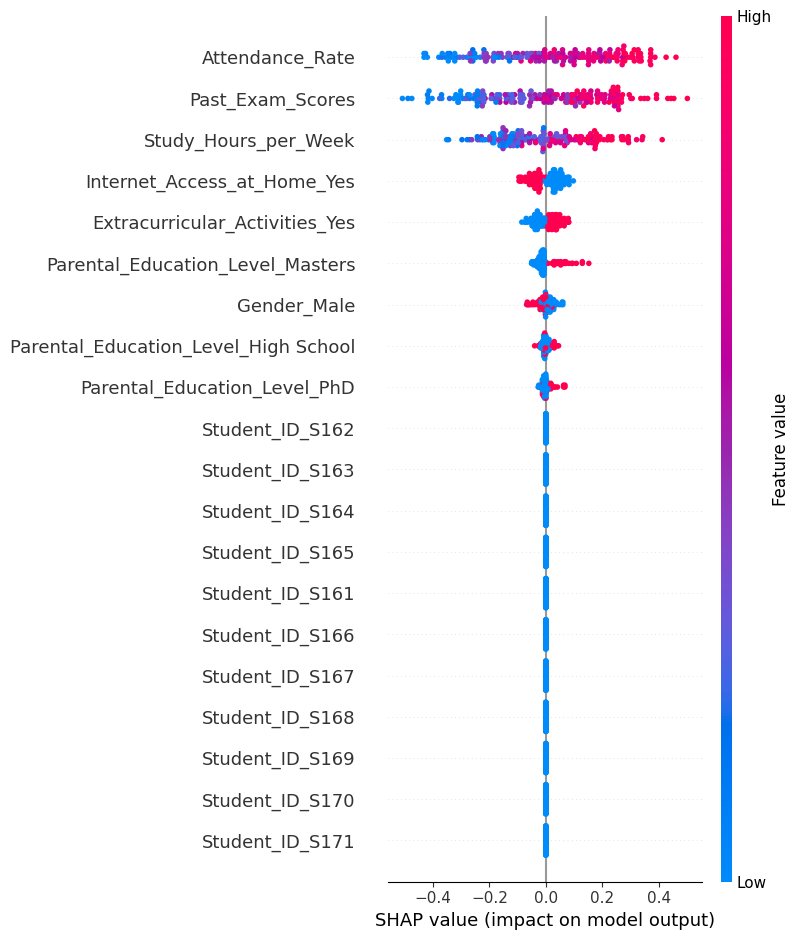

In [ ]:
# Create SHAP explainer using the LightGBM model (chosen for best performance)
explainer = shap.TreeExplainer(lgb)

# Calculate SHAP values for the test dataset
shap_values = explainer(X_test)

# Generate a global summary plot showing feature importance
shap.summary_plot(shap_values, X_test)

## 8. Interpretación individual

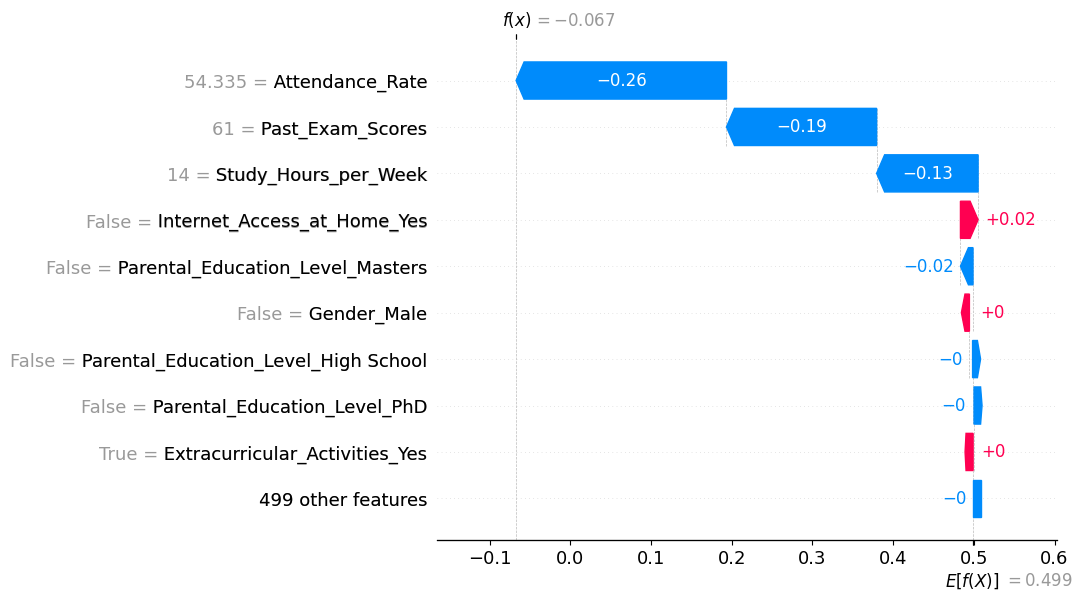

In [ ]:
shap.plots.waterfall(shap_values[0])